In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
#Cargamos los datos con los que hemos estado trabajando

datos = np.load('fit_exercise.npy')

In [4]:
#Definimos las funciones necesarias para el algoritmo

def recta(x, a, b):
    return a*x + b

def likelihood(valores, a, b):
    x = valores[0]
    y = valores[1]
    err = valores[2]
    modelo = recta(x, a, b)
    lh = - 0.5*np.sum(((y - modelo)**2)/((err)**2))
    return lh

def prior_a(a):
    c = -10
    d = 10
    W = d - c
    if a >= c and a <= d:
        p_a = 1/W
    else:
        p_a = 0
    return p_a

def prior_b(b):
    c = -10
    d = 10
    W = d - c
    if b >= c and b <= d:
        p_b = 1/W
    else:
        p_b = 0
    return p_b

In [15]:
a_lista = []
b_lista = []

for i in range(5):
    a = np.random.uniform(-8, 8)
    b = np.random.uniform(-8, 8)
    a_aux = [a]
    b_aux = [b]
    posterior = likelihood(datos, a, b) + np.log(prior_a(a)) + np.log(prior_b(b))
    for j in range(3000):
        a_new = np.random.normal(a, 0.1)
        b_new = np.random.normal(b, 0.1)
        posterior_new = likelihood(datos, a_new, b_new) + np.log(prior_a(a_new)) + np.log(prior_b(b_new))
        if posterior_new > posterior:
            a_aux.append(a_new)
            b_aux.append(b_new)
            a = a_new
            b = b_new
            posterior = posterior_new
        else:
            random = np.random.random()
            if posterior_new - posterior > random:
                a_aux.append(a_new)
                b_aux.append(b_new)
                a = a_new
                b = b_new
                posterior = posterior_new
            else:
                a_aux.append(a_new)
                b_aux.append(b_new)
    a_lista.append(a_aux)
    b_lista.append(b_aux)

Text(0, 0.5, 'b')

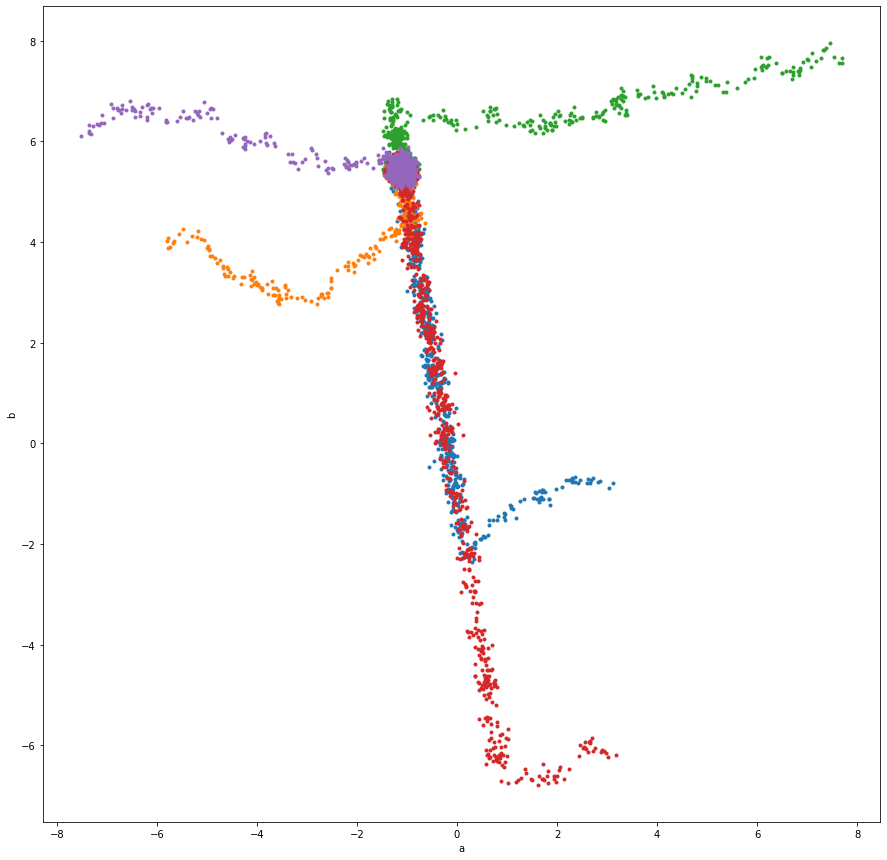

In [16]:
plt.figure(figsize=(15,15))
for i in range(5):
    plt.plot(a_lista[i], b_lista[i], '.');
plt.xlabel('a')
plt.ylabel('b')